In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
from datetime import date
stk_dataset=yf.download("RELIANCE.NS",start=date(2022,4,1),end=date(2023,4,1))
stk_dataset

In [2]:
stk_dataset=pd.read_csv('stk1.csv')

In [3]:
stk_dataset.describe()

,Close,High,Low,Open,Volume
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02
mean,1070.345638,1082.240288,1059.821388,1071.961425,1.348586e+07
std,86.586225,88.573953,84.610911,86.976060,5.361921e+06
min,932.940430,943.345544,924.208168,941.512003,1.705656e+06
25%,991.395233,1001.834836,979.901358,989.647651,9.784558e+06
50%,1085.042236,1097.991446,1075.748668,1086.841326,1.208794e+07
75%,1138.070954,1145.829194,1125.236358,1138.443469,1.575945e+07
max,1252.224731,1261.163158,1241.292431,1257.221137,2.472179e+07


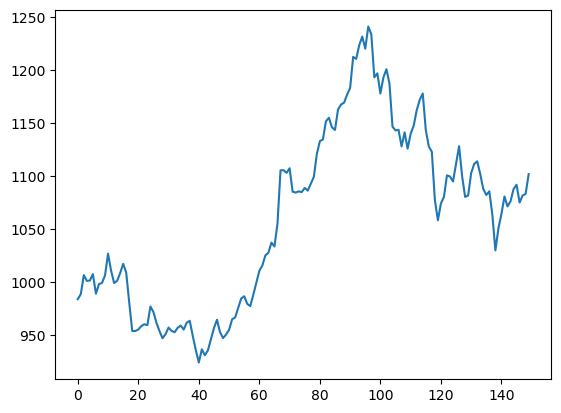

In [4]:
plt.plot(stk_dataset["Low"])

In [5]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(stk_dataset["Low"])

P_value < 0.0.5 reject null and accept alternate hypothesis     H0: Datas are non-stationary
P_value > 0.0.5 accept null and reject alternate hypothesis     H1 : Datas are stationary

In [6]:
Statistic=result[0]
p_value=result[1]
critical_values=result[4]
print("p-value<=0.05-->Accept Alternate Hypothesis")
print("p-value>0.05-->Accept Null Hypothesis")
if Statistic < critical_values["1%"] or Statistic < critical_values["5%"] or Statistic < critical_values["10%"] or p_value < 0.05:
    print(" Rejecting null and accepting alternate the data are stationary")
else:
    print(" accepting null and rejecting alternate the data are non-stationary")
 
 

p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
 accepting null and rejecting alternate the data are non-stationary


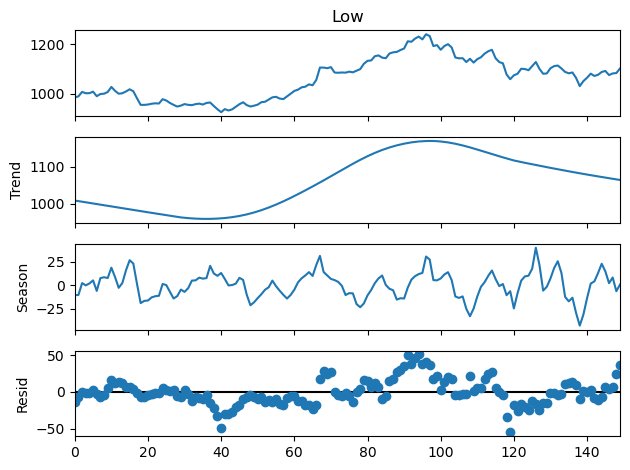

In [7]:
from statsmodels.tsa.seasonal import STL

decomposition = STL(stk_dataset["Low"], period=30).fit()  # Set `period` based on known seasonality
decomposition.plot()
plt.show()

# It is Season and trend non-stationarity

In [8]:
numeric_df = stk_dataset.select_dtypes(include='number')
stk_dataset =numeric_df.diff().dropna()

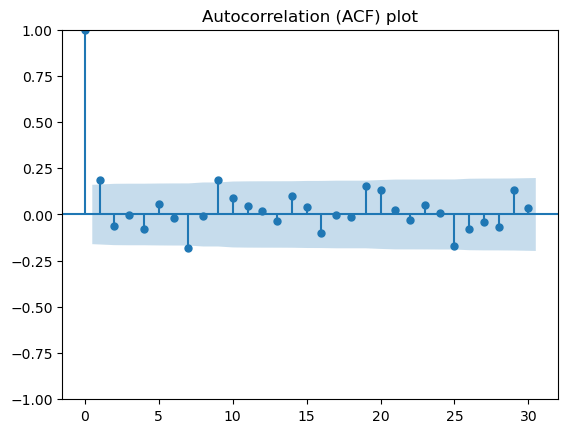

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stk_dataset["Low"],lags=30)
plt.title("Autocorrelation (ACF) plot")
plt.show()

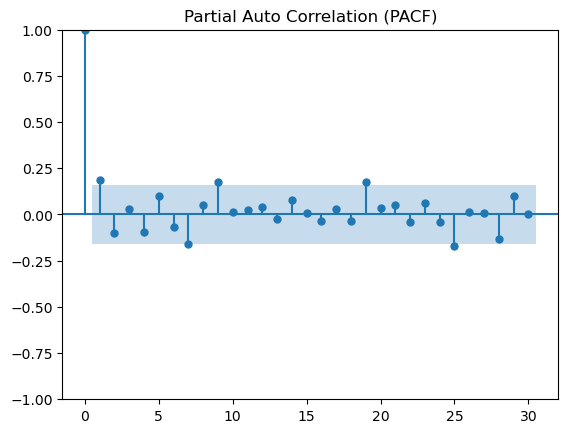

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(stk_dataset["Low"],lags=30)
plt.title("Partial Auto Correlation (PACF)")
plt.show()

ACF plot shows that datas are non statinary as it is gradually declining
In PACF the point in blue band are insignificant

In [11]:
stk_dataset["Low"]= stk_dataset["Low"]
stan=np.log1p(stk_dataset["Low"]) # log(1 + x)

C:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
stk_dataset["Low"]=stk_dataset["Low"]
stan = mms.fit_transform(stk_dataset[["Low"]])
print("Len",stan.shape)

Len (149, 1)


In [13]:
data_size=round(len(stan)*0.80)
print(data_size)
train=stan[:data_size]
test=stan[data_size:]
print(train)
print(test)
print(type(train))
print(type(stk_dataset))

119
[[0.52529499]
 [0.6624316 ]
 [0.41812559]
 [0.47854329]
 [0.53800162]
 [0.28218648]
 [0.5689297 ]
 [0.48717353]
 [0.54663336]
 [0.69192017]
 [0.30975802]
 [0.35051729]
 [0.49628445]
 [0.55070844]
 [0.56700959]
 [0.39031528]
 [0.17909562]
 [0.19252021]
 [0.47446728]
 [0.48981212]
 [0.50827187]
 [0.49388644]
 [0.46511658]
 [0.65979462]
 [0.42076401]
 [0.36849693]
 [0.39343204]
 [0.40350125]
 [0.51522502]
 [0.53991854]
 [0.44234068]
 [0.461761  ]
 [0.51858143]
 [0.49724346]
 [0.43538845]
 [0.54279612]
 [0.49364637]
 [0.32654177]
 [0.33541228]
 [0.35147469]
 [0.60513118]
 [0.41596905]
 [0.5231369 ]
 [0.58547148]
 [0.58427251]
 [0.55766019]
 [0.35267494]
 [0.41620702]
 [0.50971086]
 [0.52121897]
 [0.57851909]
 [0.49388711]
 [0.56701056]
 [0.56940925]
 [0.49772286]
 [0.40014443]
 [0.45240993]
 [0.58667057]
 [0.59242477]
 [0.59434153]
 [0.5279327 ]
 [0.57444277]
 [0.50108012]
 [0.57444344]
 [0.43658626]
 [0.70271012]
 [1.        ]
 [0.47494687]
 [0.44929243]
 [0.52026128]
 [0.24454747]
 [

In [14]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
lags=[1,2,3,4]
trends=['n','c','t','ct']
for i in lags:
    for t in trends:
        armodel=AutoReg(train,lags=i,trend=t)
        armodelcreate=armodel.fit()
        
        #“Start predicting right after the end of training, and go until the end of the full dataset.”
        #start = len(train) → first prediction is the time step immediately after training ends
        #end = len(stan) - 1 → last prediction is at the last index of the full dataset
        #len(train) = 80
        #len(stan) = 100
        #So this becomes: predict(80, 99) → predicts the next 20 values
        pred=armodelcreate.predict(len(train),len(stan)-1)
        print("Lag={},Trend={}".format(i,t))
        mse=mean_squared_error(test,pred,squared=False)
        #to replace zero values with some minute values
        safe_test = test.copy()
        safe_test[safe_test == 0] = 1e-10 
        mape=mean_absolute_percentage_error(safe_test,pred)
        print("mse={},mape={}".format(mse,mape))
        print("************")    
       
        
        


Lag=1,Trend=n
mse=0.41277547968948103,mape=0.7403794003490234
************
Lag=1,Trend=c
mse=0.15906165822843207,mape=0.3907083562255005
************
Lag=1,Trend=t
mse=0.3036093732297726,mape=0.8019442770101023
************
Lag=1,Trend=ct
mse=0.16169421149562102,mape=0.38572398754411075
************
Lag=2,Trend=n
mse=0.40496054743402415,mape=0.7163705867416471
************
Lag=2,Trend=c
mse=0.15939298561652362,mape=0.3905062127893834
************
Lag=2,Trend=t
mse=0.23380505769677287,mape=0.5767261699327414
************
Lag=2,Trend=ct
mse=0.1611327554919564,mape=0.3868849107925662
************
Lag=3,Trend=n
mse=0.35567924735269457,mape=0.609472139442154
************
Lag=3,Trend=c
mse=0.16190727663149304,mape=0.39362265986406864
************
Lag=3,Trend=t
mse=0.2032403608838821,mape=0.4054017889205915
************
Lag=3,Trend=ct
mse=0.16510623669801833,mape=0.39012325615446686
************
Lag=4,Trend=n
mse=0.3510979923010936,mape=0.6014679973957476
************
Lag=4,Trend=c
mse=0.1565

C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.wa

In [15]:
# Final model with lag3 and ct
finalAR=AutoReg(train,lags=4,trend='ct')
finalARcreate=finalAR.fit()
# This will predict the next 4 (0 to 3) values after training.
pred=finalARcreate.predict(len(train),len(train)+3)
print(pred)
print("Scaler min:", mms.data_min_)
print("Scaler max:", mms.data_max_)
print("Raw prediction before inverse:", pred)
print(pred.shape)
pred=np.expm1(pred)
print("Prediction for next four days:\n",pred)


[0.45252704 0.40937998 0.50921322 0.50899073]
Scaler min: [-45.402633]
Scaler max: [50.192565]
Raw prediction before inverse: [0.45252704 0.40937998 0.50921322 0.50899073]
(4,)
Prediction for next four days:
 [0.57228039 0.50588382 0.6639815  0.66361131]
